In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *
%matplotlib inline

In [2]:
dt= pd.read_csv('dengue_labels_train.csv')

In [3]:
df = pd.read_csv('dengue_features_train.csv',usecols=['city', 'year', 'weekofyear', 'week_start_date'])

In [4]:
df.columns

Index(['city', 'year', 'weekofyear', 'week_start_date'], dtype='object')

In [5]:
df['week_start_date'] = pd.to_datetime(df['week_start_date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   city             1456 non-null   object        
 1   year             1456 non-null   int64         
 2   weekofyear       1456 non-null   int64         
 3   week_start_date  1456 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 45.6+ KB


In [7]:
 df['mes'] = df['week_start_date'].dt.month#_name()

In [8]:
df.mes.value_counts()

1     140
4     140
7     140
10    133
9     119
2     112
3     112
5     112
6     112
8     112
11    112
12    112
Name: mes, dtype: int64

In [9]:
dt = dt.merge(df)

In [10]:
dt

,city,year,weekofyear,total_cases,week_start_date,mes
0,sj,1990,18,4,1990-04-30,4
1,sj,1990,19,5,1990-05-07,5
2,sj,1990,20,4,1990-05-14,5
3,sj,1990,21,3,1990-05-21,5
4,sj,1990,22,6,1990-05-28,5
...,...,...,...,...,...,...
1451,iq,2010,21,5,2010-05-28,5
1452,iq,2010,22,8,2010-06-04,6
1453,iq,2010,23,1,2010-06-11,6
1454,iq,2010,24,1,2010-06-18,6


In [11]:
dt.head(5)

,city,year,weekofyear,total_cases,week_start_date,mes
0,sj,1990,18,4,1990-04-30,4
1,sj,1990,19,5,1990-05-07,5
2,sj,1990,20,4,1990-05-14,5
3,sj,1990,21,3,1990-05-21,5
4,sj,1990,22,6,1990-05-28,5


In [12]:
dt.city.value_counts()

sj    936
iq    520
Name: city, dtype: int64

In [13]:
dt = dt.groupby('city')

In [14]:
sj = dt.get_group('sj')

In [15]:
#sj.sort_values(by='mes')#,axis=1,inplace=True)
#sj = Sort_Dataframeby_Month(df=sj,monthcolumnname='mes')

In [16]:
sj.columns

Index(['city', 'year', 'weekofyear', 'total_cases', 'week_start_date', 'mes'], dtype='object')

In [17]:
sj

,city,year,weekofyear,total_cases,week_start_date,mes
0,sj,1990,18,4,1990-04-30,4
1,sj,1990,19,5,1990-05-07,5
2,sj,1990,20,4,1990-05-14,5
3,sj,1990,21,3,1990-05-21,5
4,sj,1990,22,6,1990-05-28,5
...,...,...,...,...,...,...
931,sj,2008,13,4,2008-03-25,3
932,sj,2008,14,3,2008-04-01,4
933,sj,2008,15,1,2008-04-08,4
934,sj,2008,16,3,2008-04-15,4


In [18]:
for_heatmap_sj = sj.pivot_table(index='year', columns='mes', values='total_cases')

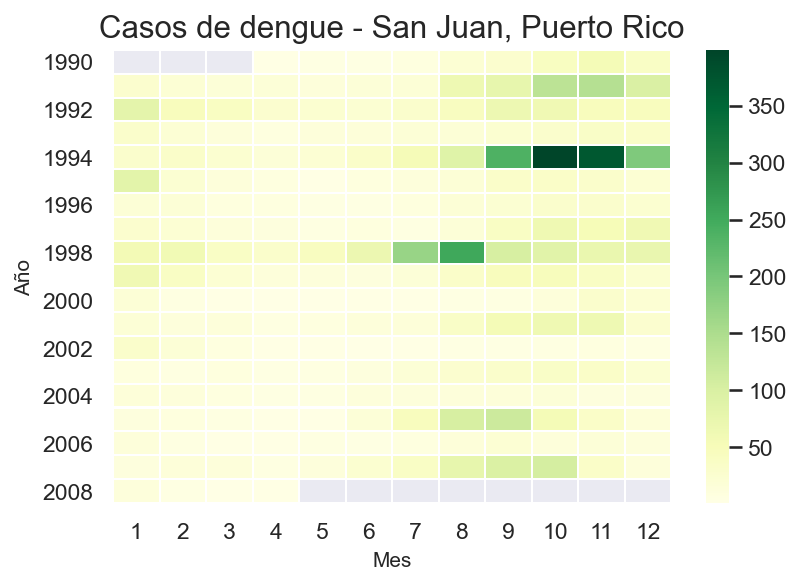

In [19]:
sns.set(rc={"figure.dpi":150})
graficoSJ = sns.heatmap(for_heatmap_sj, linewidths=.5, cmap="YlGn")
graficoSJ.set_title('Casos de dengue - San Juan, Puerto Rico',size =15)
graficoSJ.set_ylabel('Año', fontsize = 10)
graficoSJ.set_xlabel('Mes', fontsize = 10)
fig = graficoSJ.get_figure()
fig.savefig("heatmap-CasosSJ.png")

In [20]:
iq = dt.get_group('iq')

In [21]:
iq.isnull().sum()

city               0
year               0
weekofyear         0
total_cases        0
week_start_date    0
mes                0
dtype: int64

In [22]:
iq.year.value_counts()

2001    52
2002    52
2003    52
2004    52
2005    52
2006    52
2007    52
2008    52
2009    52
2000    26
2010    26
Name: year, dtype: int64

In [23]:
for_heatmap_iq = iq.pivot_table(index='year', columns='mes', values='total_cases')

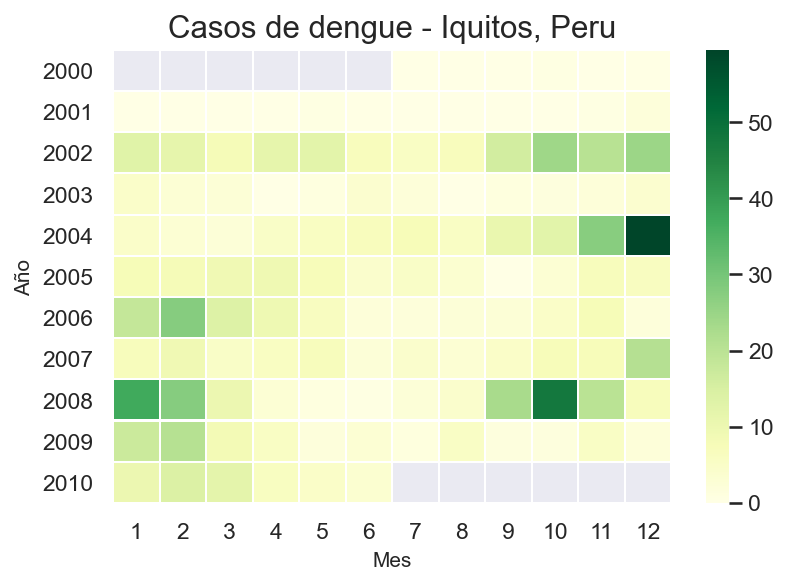

In [24]:
sns.set(rc={"figure.dpi":150})
graficoIQ = sns.heatmap(for_heatmap_iq, linewidths=.5, cmap='YlGn')
graficoIQ.set_title('Casos de dengue - Iquitos, Peru',size =15)
#graficoIQ.set_title('Dengue cases - Iquitos, Peru',size =15)
graficoIQ.set_xlabel("Mes", fontsize = 10)
#graficoIQ.set_xlabel("", fontsize = 10)
graficoIQ.set_ylabel('Año', fontsize = 10)
#graficoIQ.set_ylabel('Year', fontsize = 10)
fig = graficoIQ.get_figure()
fig.savefig("heatmap-CasosIQ.png")